In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

In [16]:

#Investment (present value)
pv=100000
#Time horizon of one month no weekends is about 21 days
t=21
#no of trading days in one year
tradingdays=252


In [17]:
#setup of start and end times for volitility tracker
endtime=datetime.now()
starttime= endtime-timedelta(365)
end=endtime.strftime("%Y-%m-%d")
start=starttime.strftime('%Y-%m-%d')
#picking a stock
ticker='BTC-USD'
# [Corrected code]
data = yf.download(ticker, start=start, end=end)[['Close']].copy()
data['Log Returns']=np.log(data['Close'])/data['Close'].shift(1)
dailyvol=np.std(data['Log Returns'])
vol=dailyvol*tradingdays**0.5



C:\Users\jcf31\AppData\Local\Temp\ipykernel_3112\2115813641.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end)[['Close']].copy()
[*********************100%***********************]  1 of 1 completed


In [18]:
#getting most recent price
price = data['Close'].values[-1:][0]
#expected return
er=0.25
#actual quantity of shares that can be bought
q=np.round(pv/price,0)
value=q*price

In [19]:
#the monte carlo function
def MC_VAR(pv,er,vol,T,iterations):
    #ends uses the geometric brownian motion formula
    ends = pv * np.exp((er-.5*vol**2)*T+vol*np.sqrt(T)*np.random.standard_normal(iterations))
    endingValue=ends-pv
    return endingValue

In [20]:
iterations = 100000
At_risk=MC_VAR(pv=value, er=er,vol=vol, T=t/tradingdays,iterations=iterations)
At_risk

array([1778.19734586, 1781.48650088, 1776.4169585 , ..., 1775.38353566,
       1773.1779443 , 1781.12957996])

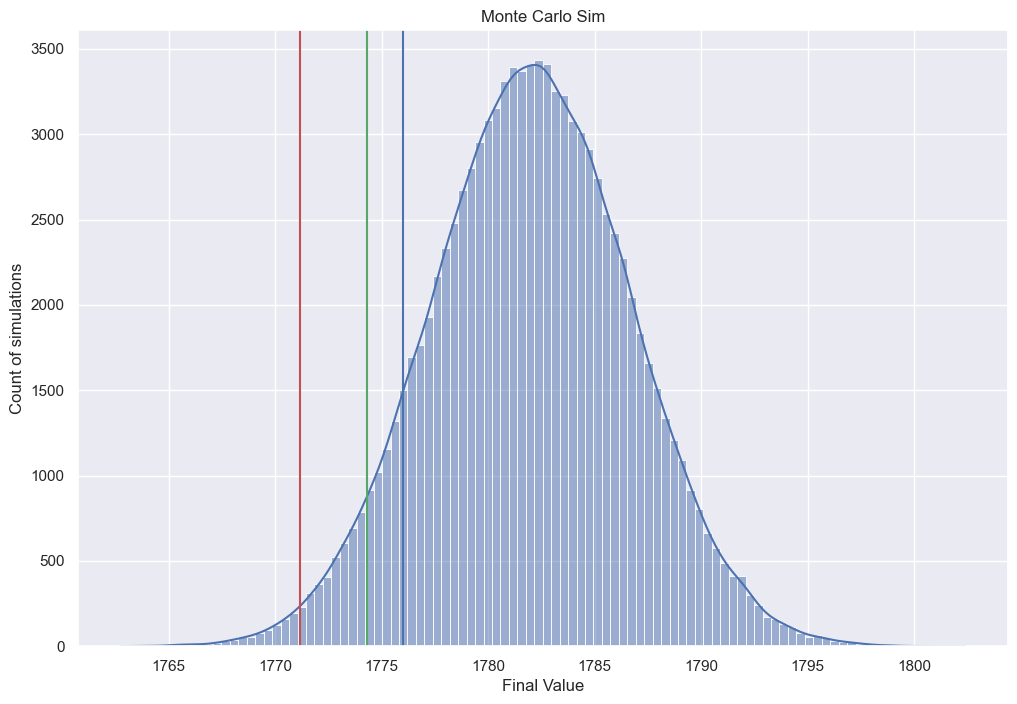

In [21]:
import seaborn as sns
sns.set_theme()
ending=At_risk
plt.figure(figsize=(12,8))
chart = sns.histplot(data=At_risk, bins=100, kde=True)
plt.axvline(np.percentile(At_risk, 1),color='r')
plt.axvline(np.percentile(At_risk, 5),color='g')
plt.axvline(np.percentile(At_risk, 10),color='b')
plt.title('Monte Carlo Sim')
plt.xlabel('Final Value')
plt.ylabel('Count of simulations')
plt.show()
